# Trabajo Práctico 1 - Matrices de Insumo Producto

## Enunciado

### Consigna 1 - 

1. En ese caso el sistema tiene solución y es única.
2. En este caso  __p__ = 0 \.
3. En este caso hay que analizar (__1__) pues (__I-A__) no es inversible. Nos queda el sistema (__I-A__) __p__ = __d__ . Como (__I-A__) no es inversible, entonces el sistema no tiene solución o tiene infinitas soluciones.
4. En este caso tenemos el siguiente sistema homogéneo (__I-A__) __p__ = 0 . Como tenemos un homogéneo e (__I-A__) no es inversible , entonces el sistema tiene infinitas soluciones.

### Consigna 2 -  

In [8]:
import numpy as np
from funciones import *

### Consigna 3 -

In [11]:
A = np.array([[0.3,0,0.1],[0.05,1.0,0.2],[0.1,0.15,0.1]])
d = np.array([100,100,300])
ML = np.eye(np.shape(A)[0]) - A

#calculamos L, U, P y la inversa de ML:
L, U, P = calcularLU(ML)
ML_inv = inversaLU(L,U,P)

#calculamos p:
p = ML_inv @ d
print(f'p = \n {p}')

esto es n---> 3
Pivote 1 es nulo
[(-0.15, 2)]
L despues de permutar 
 [[ 1.          0.          0.        ]
 [-0.14285714  1.          0.        ]
 [-0.07142857  0.          1.        ]]
(3, 3)
p = 
 [   68.96551724 -5149.42528736  -517.24137931]


 Este resultado para la producción se debe a que en la matriz A, $a_{22}$ es 1, es decir se utiliza un 100% del producto 2 para producir este mismo producto, es por ello que en el vector de produccion la segunda coordenada es negativa, esto tambien explica porque sucede lo mismo en la tercera coordenada del vector,  ya que para producir el producto 3 se requiere un 15% de producto 2 y este fue utilizado en su totalidad para generarse a si mismo.

### Consigna 4 - 

Primero escribimos **(2)** con **p'** y **d'**.

$$
\mathbf{p}' = (I - A)^{-1} \mathbf{d}'
$$

$$
\mathbf{p}' = (I - A)^{-1} \left( \begin{bmatrix} d_1 \\ d_2 \\ d_3 \end{bmatrix} + \begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix} \right)
$$

Si distribuimos la matriz de **Leontief** nos queda:

$$
\mathbf{p}' = \mathbf{p} + (I - A)^{-1}  \begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix}
$$

Luego...

$$
\Delta p = \mathbf{p}' - \mathbf{p}
$$

Finalmente:

$$
\Delta p = (I - A)^{-1} \Delta d
$$

### Consigna 5 - 

* Escribimos los datos del problema:

In [19]:

Z = np.array([[350,0,0],[50,250,150],[200,150,550]])
P_inv = np.array([[1/1000,0,0],[0,1/500,0],[0,0,1/1000]]) #P_inv_ij = 1/(P_ij), ya que P es una matriz diagonal.


* Calculamos los coeficientes tecnicos de la matriz **A**:

In [22]:
A = Z @ P_inv
print(f'A = \n {A}')

A = 
 [[0.35 0.   0.  ]
 [0.05 0.5  0.15]
 [0.2  0.3  0.55]]


* Ahora calculamos la matriz de Leontief:

In [25]:
ImenosA = np.eye(3) - A
L, U, P = calcularLU(ImenosA)

ML = inversaLU(L,U,P)

print(f'Matriz de Leontief:\n {ML}')

#print(ImenosA @ ML) para chequear que vale.

esto es n---> 3
(3, 3)
Matriz de Leontief:
 [[1.53846154 0.         0.        ]
 [0.44871795 2.5        0.83333333]
 [0.98290598 1.66666667 2.77777778]]


### Consigna 6
### Consigna 6
Paritmos de la ecuacion  **(4)** :

$$

\left(

\begin{pmatrix}
I_{n \times n} & 0_{n \times m}
\\
0_{m \times n} & I_{m \times m}
\end{pmatrix} 

-

\begin{pmatrix}
A^{rr} & A^{rs}
\\
A^{sr} & A^{ss}
\end{pmatrix} 

\right)

\begin{pmatrix}
p^{r}
\\
p^{s}
\end{pmatrix} 

=
\begin{pmatrix}
d^{r}
\\
d^{s}
\end{pmatrix} 


$$



Si agregamos la variacion de la producion en la region **r**  con la variacion de demanda en S = 0 y realizamos la primera resta de matrices en el lado izquierdo


$$


\left(

\begin{pmatrix}
I_{n \times n} - A^{rr} & -A^{rs}
\\
-A^{sr} & I_{m \times m} -A^{ss}
\end{pmatrix} 

\right)

\begin{pmatrix}
p^{r} + \Delta p^{r}
\\
P^{s}+ \Delta p^{s}
\end{pmatrix} 

=
\begin{pmatrix}
d^{r} + \Delta d^{r}
\\
d^{s}
\end{pmatrix} 

$$

De aquí podemos extraer dos ecuaciones claves

$$
\begin{gather}
   (I-A^{rr}) \Delta p^{r} - A^{rs} \Delta p ^{s} = \Delta d^{r}
   \\
   (-A^{sr}) \Delta p^{r} + (I-A^{rs}) \Delta p ^{s} = 0
\end{gather}
$$
Esto ya que solo considero la aparicion de las variaciones en la demanda debe ser igual a la nueva multiplicacion que genera las variaciones en la producción de p.
Luego, en **(2)**
$$
\implies (I-A^{rs}) \Delta p ^{s} = A^{sr} \Delta p^{r} 

\\

\Leftrightarrow \Delta p ^{s} = (I-A^{rs})^{-1} A^{sr} \Delta p^{r} 
$$


En **(1)**...

$$

(I-A^{rr}) \Delta p^{r} - A^{rs} (I-A^{rs})^{-1} A^{sr} \Delta p^{r}  = \Delta d^{r}
\\
\implies ((I-A^{rr}) - A^{rs} (I-A^{rs})^{-1} A^{sr}) \Delta p^{r} = \Delta d^{r}
\\

$$
Por lo tanto...
$$
\Delta p^{r} = ((I-A^{rr}) - A^{rs} (I-A^{rs})^{-1} A^{sr})^{-1} \Delta d^{r}

### Consigna 7

* Importamos pandas y descargamos los datos.

In [30]:
import pandas as pd

nombreFile = "matrizlatina2011_compressed_0.xlsx"
archivo = pd.read_excel(nombreFile, sheet_name=1)

* Seleccionamos los paises y generamos las matrices insumo producto de las regiones:

In [32]:
p1="SLV"
p2="PAN"

<h1><u>Matrices intra-regionales:</u></h1>

1. Panamá 

In [37]:
panama = archivo[archivo["Country_iso3"]==p2] #seleccionamos las filas de Panamá

iPP= panama.filter(regex='^PAN', axis=1) #seleccionamos las columas de Panamá

outputP=panama["Output"] #Output es el total producido

output01P= outputP.replace(0,1) #Cambiamos los 0s por los 1s en el vector de produccion total, para luego poder calcular A con la fórmula dada en la 
                                #seccion de coeficientes técnicos. ( A = ZP^-1).

2. El Salvador

In [39]:
salvador = archivo[archivo["Country_iso3"]==p1] #seleccionamos las filas de El Salvador


iSS= salvador.filter(regex='^SLV', axis=1) #seleccionamos las columas de El Salvador

outputS = salvador["Output"] #Output es el total producido

output01S=outputS.replace(0,1) #Cambiamos los 0s por los 1s en el vector de produccion total, para luego poder calcular A con la fórmula dada en la 
                                #seccion de coeficientes técnicos. ( A = ZP^-1).

<h1><u>Matrices inter-regionales:</u></h1>

1. Panamá-Salvador

In [42]:
iPS= panama.filter(regex='^SLV', axis=1) #de la matriz generada por la selección de filas de Panamá, seleccionamos las columnas de El Salvador.

2. Salvador-Panamá

In [44]:
iSP= salvador.filter(regex='^PAN', axis=1) #de la matriz generada por la selección de filas de El Salvador, seleccionamos las columnas de Panamá.

<h1><u>Coeficientes técnicos</u></h1>

Primero definimos una funcion para calcularlos de una forma mas eficiente.

In [47]:
def coeficientesTecnicos(Z,P):
    P= np.diag(P)
    L, U, Per = calcularLU(P)
    P_inv = inversaLU(L, U, Per)
    A =Z@P_inv
    
    return  A

Ahora realizamos los calculos:

In [49]:
APP = coeficientesTecnicos(iPP, output01P)

ASP=coeficientesTecnicos(iSP, output01P)

ASS= coeficientesTecnicos(iSS, output01S) 

APS= coeficientesTecnicos(iPS, output01S)

esto es n---> 40
(40, 40)
esto es n---> 40
(40, 40)
esto es n---> 40
(40, 40)
esto es n---> 40
(40, 40)


<h1><u>Simulación de shock de demanda</u></h1>

Para generar el shock primero debemos calcular la demanda, para ello utilizamos ec __(4)__.

In [52]:
def demandaCalculator(RR,RS,SR,SS,pR,pS):
    
    tamañoIdentidad=np.shape(RR)[0] + np.shape(SS)[1]
    
    identidadSuper= np.eye(tamañoIdentidad)
    
    up = np.hstack((RR,RS))
    
    down = np.hstack((SR,SS))
    
    ASuper= np.vstack((up,down))
    
    restaSuper = identidadSuper - ASuper
    
    productoSuper = np.hstack((pR,pS))
    
    demandaSuper= restaSuper @ productoSuper
    
    #######SEPARAMOS LAS DEMANDAS R,S ##########
    
    demandatamaño=np.shape(demandaSuper)[0]
    
    dR= demandaSuper[0:int(demandatamaño/2)]
    
    dS= demandaSuper[int(demandatamaño/2):demandatamaño]

    return dR, dS

Utilizamos la función para calcular la demanda:

In [54]:
dP,dS=demandaCalculator(APP, APS, ASP, ASS, outputP, outputS)

Ahora generamos el shock:

In [56]:
def deltaD_generator(demanda, shocks):
    demandaPrima = demanda.copy()
    for i in range(len(shocks)):
        demandaPrima[shocks[i][0]-1] = demanda[shocks[i][0]-1] + demanda[shocks[i][0]-1] * shocks[i][1]
        
    deltaD = demanda - demandaPrima
    return deltaD

shocks = [[5,-0.1],[6,0.33],[7,0.33],[8,0.33]]

deltaD = deltaD_generator(dP, shocks)

<h1><u>Modelo de región simple vs Fórmula completa</u></h1>

1. Primero hacemos los cálculos para el modelo de región simple.

In [70]:
ImenosAPP = np.eye(np.shape(APP)[0]) - APP
ImenosAPP_arr = ImenosAPP.to_numpy()

L1, U1, Per1 = calcularLU(ImenosAPP_arr)
ML = inversaLU(L1,U1,Per1)
    
deltaPp_simple = ML @ deltaD

esto es n---> 40
(40, 40)


2. Ahora hacemos los cálculos usando la fórmula completa

In [73]:
#pasamos todos los dataframes que aparecen en la fórmula a matrices de numpy:
    
ImenosASS = np.eye(np.shape(ASS)[0]) - ASS
ImenosASS_arr = ImenosASS.to_numpy()

APS_arr = APS.to_numpy()

ASP_arr = ASP.to_numpy()

#calculos previos:

L, U, Per = calcularLU(ImenosASS_arr)    
ML_ASS = inversaLU(L,U,Per)

granTermino = ImenosAPP_arr - APS_arr @ ML_ASS @ ASP_arr

L, U, Per = calcularLU(granTermino)
granTermino_inv = inversaLU(L,U,Per)

#calculo final:

deltaPp_completa = granTermino_inv @ deltaD

esto es n---> 40
(40, 40)
esto es n---> 40
(40, 40)


3. Finalemente hacemos un gráfico para comparar los resultados.

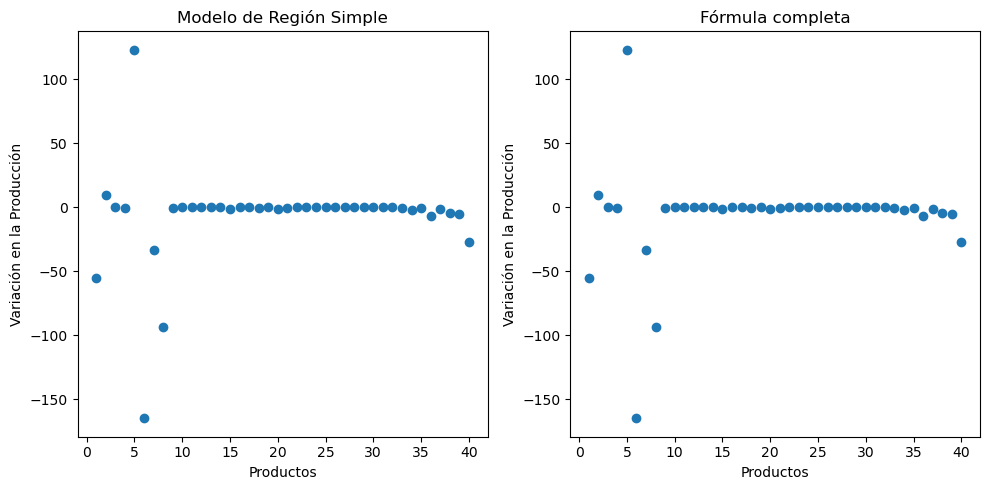

In [78]:
import matplotlib.pyplot as plt


x = np.arange(1,41)

fig, (DeltaP_simple, DeltaP_completa) = plt.subplots(1, 2, figsize=(10, 5))

# Gráfico 1
DeltaP_simple.scatter(x, deltaPp_simple)
DeltaP_simple.set_xlabel('Productos')
DeltaP_simple.set_ylabel('Variación en la Producción')
DeltaP_simple.set_title('Modelo de Región Simple')

# Gráfico 2
DeltaP_completa.scatter(x, deltaPp_completa)
DeltaP_completa.set_xlabel('Productos')
DeltaP_completa.set_ylabel('Variación en la Producción')
DeltaP_completa.set_title('Fórmula completa')


plt.tight_layout()

plt.show()